# Example usage of `tslearn.metrics`

`tslearn` provides a `metrics` package that aims at delivering standard metrics to compare time series.
In this notebook, we present basic usage of this package.

Populating the interactive namespace from numpy and matplotlib


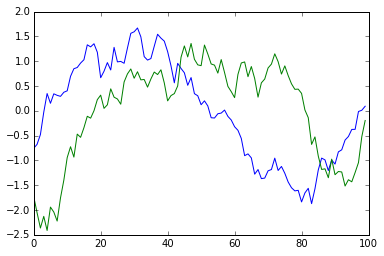

In [1]:
%pylab inline
import sys
sys.path.append("../../")  # Add tslearn base directory to Python path

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics

numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

pylab.plot(numpy.arange(sz), dataset[0, :, 0]);
pylab.plot(numpy.arange(sz), dataset[1, :, 0]);

## Dynamic Time Warping (DTW)

Let us start by computing DTW similarity between time series:

In [2]:
sim = metrics.dtw(dataset[0], dataset[1])
print(sim)

4.48525726555


If you also need the corresponding DTW path, you could use:

In [3]:
path, sim = metrics.dtw_path(dataset[0], dataset[1])
print(path)
print(sim)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 12), (2, 13), (2, 14), (2, 15), (3, 16), (3, 17), (3, 18), (4, 19), (4, 20), (5, 21), (5, 22), (6, 23), (7, 24), (8, 25), (9, 26), (10, 27), (11, 28), (11, 29), (11, 30), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 41), (11, 42), (11, 43), (12, 44), (13, 44), (14, 44), (15, 44), (16, 45), (17, 45), (18, 45), (19, 46), (20, 46), (21, 46), (22, 46), (23, 46), (24, 46), (25, 46), (26, 46), (27, 46), (28, 47), (29, 47), (30, 47), (31, 47), (32, 47), (33, 48), (34, 49), (35, 50), (36, 51), (37, 51), (38, 51), (39, 51), (40, 52), (41, 53), (41, 54), (41, 55), (41, 56), (41, 57), (42, 58), (42, 59), (42, 60), (42, 61), (43, 62), (43, 63), (44, 64), (44, 65), (45, 66), (45, 67), (45, 68), (45, 69), (45, 70), (45, 71), (45, 72), (45, 73), (45, 74), (45, 75), (45, 76), (46, 77), (47, 77), (48, 78), (48, 79), (49, 80), (50, 81), (51, 8

To visualize the obtained path, let us build a matrix with the path:

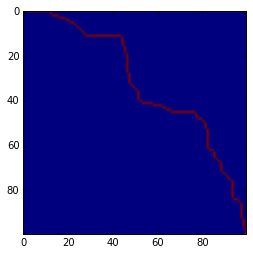

In [4]:
matrix_path = numpy.zeros((sz, sz), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

pylab.imshow(matrix_path);

## Locally-Regularized Dynamic Time Warping (LR-DTW)

The `metrics` package also provides a variant of DTW called LR-DTW that has the ability to find fuzzy alignment paths between time series. This work is not published yet.

6.03773143406


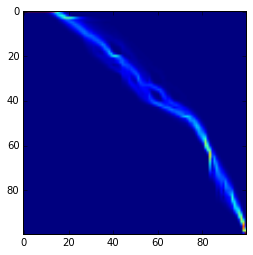

In [5]:
gamma = 1.0  # gamma indicates the level of fuzziness (gamma=0. gives DTW)
path, sim = metrics.lr_dtw_path(dataset[0], dataset[1], gamma=gamma)
print(sim)

pylab.imshow(path);